# Data Preparation and Cleansing

In [31]:
import pandas as pd

df=pd.read_excel('suicide_data.xlsx')

In [17]:
# for col in df.columns:
#     print(f"განსხვავებული მნიშვნელობები '{col}':")
#     print(df[col].unique())
#     print("-----------------------------------------------------")

In [7]:
# age converting
df['ასაკი'] = pd.to_numeric(df['ასაკი'], errors='coerce')

# cleansing values
for col in df.columns:
    if df[col].dtype == 'object': 
        df[col] = df[col].str.strip()


In [9]:
# df['სუიციდი/სუიციდის მცდელობა'] = df.apply(lambda row: row['მცდელობა'] if pd.isna(row['სუიციდი']) else row['სუიციდი'],axis=1)

df.insert(0, 'სუიციდი/სუიციდის მცდელობა', df.apply(
    lambda row: row['მცდელობა'] if pd.isna(row['სუიციდი']) else row['სუიციდი'],
    axis=1
))

df.drop(columns=['სუიციდი', 'მცდელობა'], inplace=True)

In [11]:
def optim():
    df['მოქალაქეობა'] = df['მოქალაქეობა'].replace({
        'თურქეთის რესპუბლიკა': 'თურქეთი',
        'ირანის ისლამური რესპუბლიკა': 'ირანი',
        'ლიბანის რესპუბლიკა': 'ლიბანი',
        'რუსეთის ფედერაცია': 'რუსეთი',
        'საქართველოს': 'საქართველო',
        'საქართველო; რუსეთის ფედერაცია': 'საქართველო/რუსეთი',
        'აშშ, რუსეთი': 'აშშ/რუსეთი',
        'დაუდგენელი': 'უცნობია',
    })
    
    # ase aqvt dayopili meravi
    df['რეგიონი'] = df['რეგიონი'].replace({
        'რაჭა-ლეჩხუმი და ქვემო სვანეთი': 'იმერეთი, რაჭა-ლეჩხუმი და ქვემო სვანეთი',
        'იმერეთი': 'იმერეთი, რაჭა-ლეჩხუმი და ქვემო სვანეთი'
    })

optim()
    

In [15]:
df.to_excel('suicide_data.xlsx', index=False)

# Outliers Detection


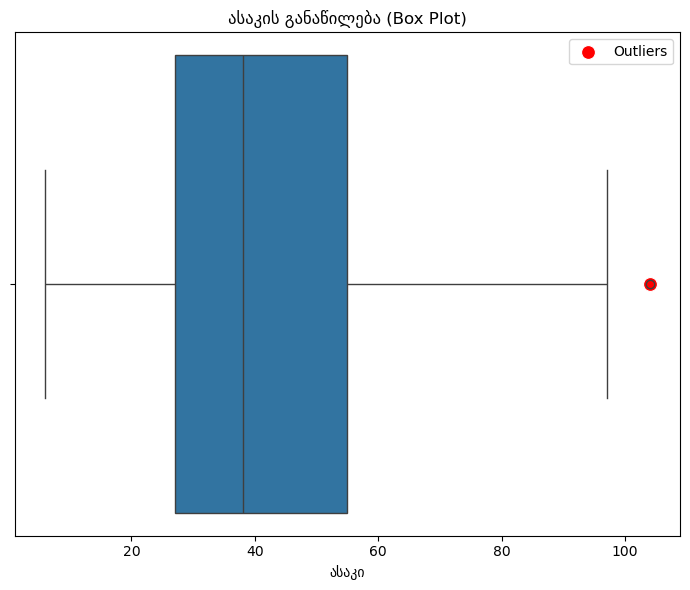

--------------------------------------------------
1480    104.0
Name: ასაკი, dtype: float64


In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_excel('suicide_data.xlsx')

Q1 = df['ასაკი'].quantile(0.25)
Q3 = df['ასაკი'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
age_outliers = df[(df['ასაკი'] < lower_bound) | (df['ასაკი'] > upper_bound)]

fig, ax = plt.subplots(figsize=(7, 6))

# Outliers in age col using boxplot 
sns.boxplot(x=df['ასაკი'], ax=ax)
ax.set_title("ასაკის განაწილება (Box Plot)")
ax.set_xlabel("ასაკი")
sns.scatterplot(x=age_outliers['ასაკი'], y=[0] * len(age_outliers), color='red', ax=ax, label="Outliers", s=100)

plt.tight_layout()
plt.show()


print('-'*50)
print(age_outliers['ასაკი'])


In [69]:
# leave for now own rare case and not dropping
# df.drop(age_outliers.index, inplace=True)


In [147]:
df.isnull().sum()

სუიციდი/სუიციდის მცდელობა    0
ასაკი                        1
სქესი                        0
მოქალაქეობა                  0
რეგიონი                      0
წელი                         0
dtype: int64

In [149]:
df['ასაკი'] = df['ასაკი'].fillna(df['ასაკი'].median()).astype(float)